In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## Load Data


In [14]:
insurance_data = pd.read_csv("../healthcare-eda-python/insurance.csv")
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [15]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


## Numbers of Records and columns

In [17]:
insurance_data.shape

(1338, 7)

In [18]:
insurance_data.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [19]:
insurance_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Data Information

In [20]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Checking for Duplicate Records

In [21]:
insurance_data.duplicated().any()

np.True_

In [22]:
insurance_data[insurance_data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [23]:
insurance_data1 = insurance_data.drop_duplicates()

In [24]:
insurance_data1.shape

(1337, 7)

### Checking for Missing Values

In [25]:
insurance_data1.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [26]:
insurance_data1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### List of Categorical and Numeric Columns

In [27]:
Numerical_columns = insurance_data1.select_dtypes(include="number").columns.to_list()
Categorical_columns = insurance_data1.select_dtypes(exclude = "number").columns.to_list()
print(f"Numerical columns in the data:{Numerical_columns}")
print(f"Categorical columns in the data:{Categorical_columns}")

Numerical columns in the data:['age', 'bmi', 'children', 'charges']
Categorical columns in the data:['sex', 'smoker', 'region']


####  Statistical Measure of Numeric Columns

In [28]:
insurance_data1.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


####  Statistical Measure of Categorical Columns

In [29]:
insurance_data1.describe(exclude="number")

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [30]:
insurance_data1.sex.unique()

array(['female', 'male'], dtype=object)

In [31]:
insurance_data1.sex.nunique()

2

In [32]:
insurance_data1.sex.value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [33]:
print(insurance_data1.smoker.unique())
print()
print(insurance_data1.smoker.nunique())
print()
print(insurance_data1.smoker.value_counts())
print()


['yes' 'no']

2

smoker
no     1063
yes     274
Name: count, dtype: int64



In [34]:
print(insurance_data1.region.unique())
print()
print(insurance_data1.region.nunique())
print()
print(insurance_data1.region.value_counts())
print()


['southwest' 'southeast' 'northwest' 'northeast']

4

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64



### Data Visualization

##### Histogram Numeric columns

In [35]:
Numerical_columns

['age', 'bmi', 'children', 'charges']

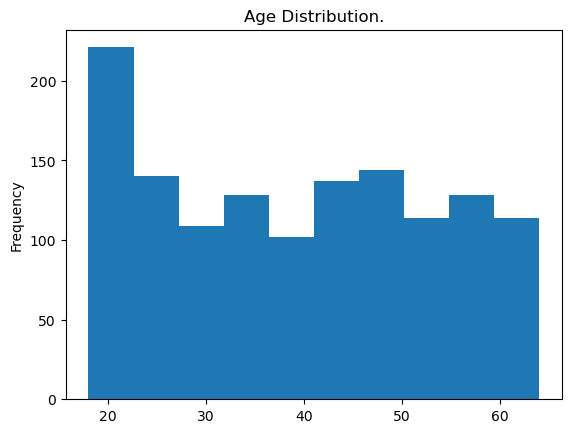

In [36]:
insurance_data1['age'].plot(kind = 'hist')
plt.title("Age Distribution.")
plt.show()

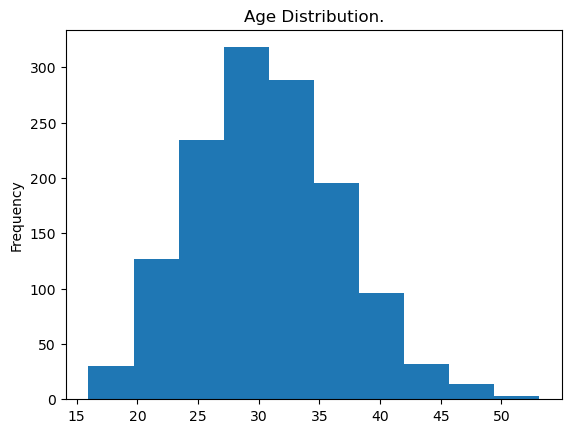

In [37]:
insurance_data1['bmi'].plot(kind = 'hist')
plt.title("Age Distribution.")
plt.show()

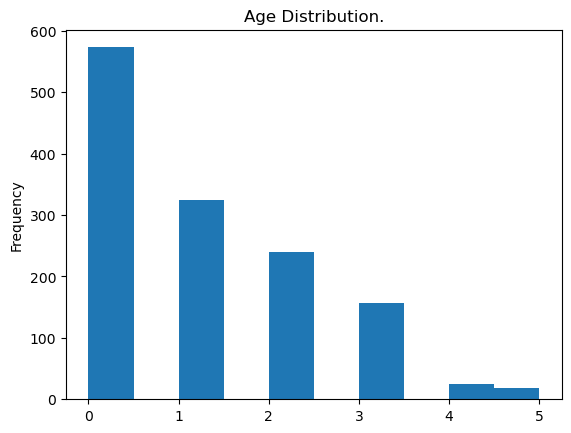

In [38]:
insurance_data1['children'].plot(kind = 'hist')
plt.title("Age Distribution.")
plt.show()

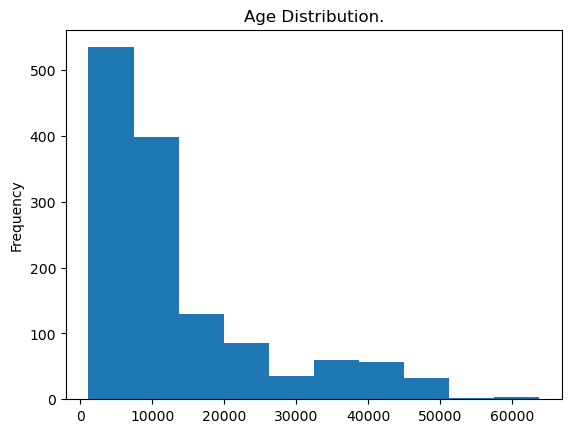

In [39]:
insurance_data1['charges'].plot(kind = 'hist')
plt.title("Age Distribution.")
plt.show()

Bar Graph Categorical Columns

<Axes: xlabel='children'>

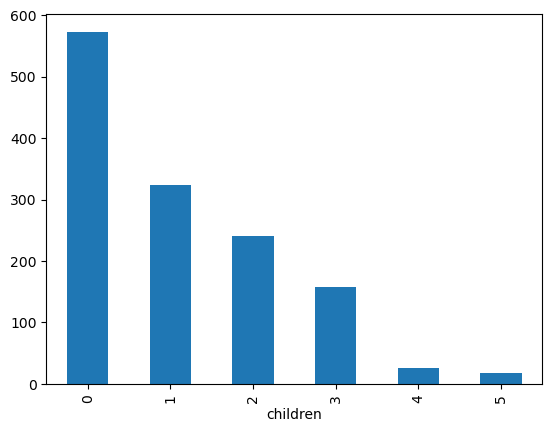

In [40]:
insurance_data1["children"].value_counts().plot(kind ='bar')

<Axes: xlabel='sex'>

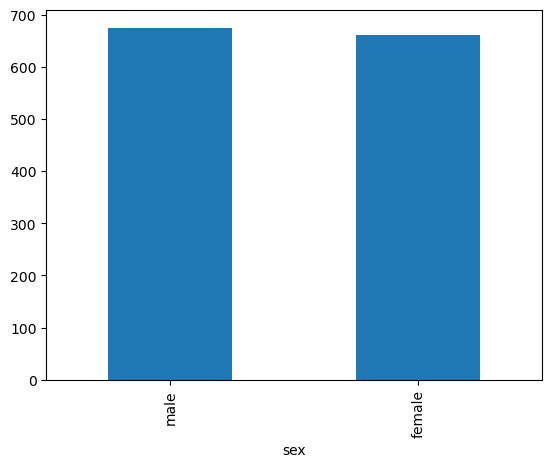

In [41]:
insurance_data1["sex"].value_counts().plot(kind ='bar')

<Axes: xlabel='region'>

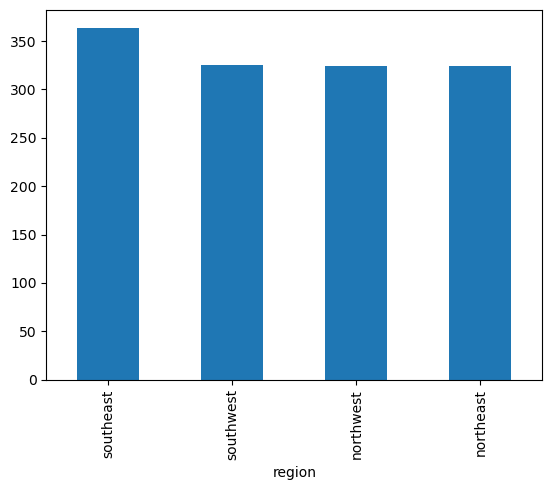

In [42]:
insurance_data1["region"].value_counts().plot(kind ='bar')

Box plot Numeric Columns

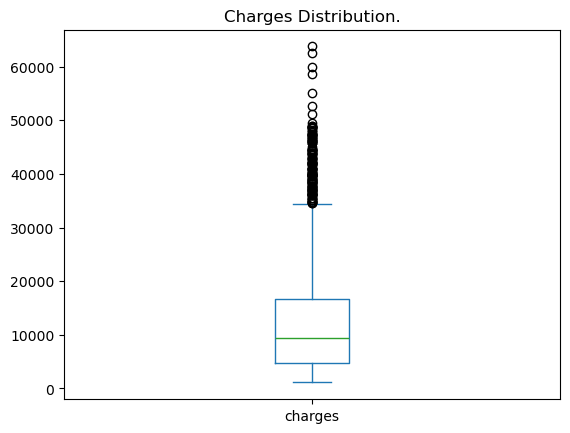

In [43]:
insurance_data1['charges'].plot(kind = 'box')
plt.title("Charges Distribution.")
plt.show()

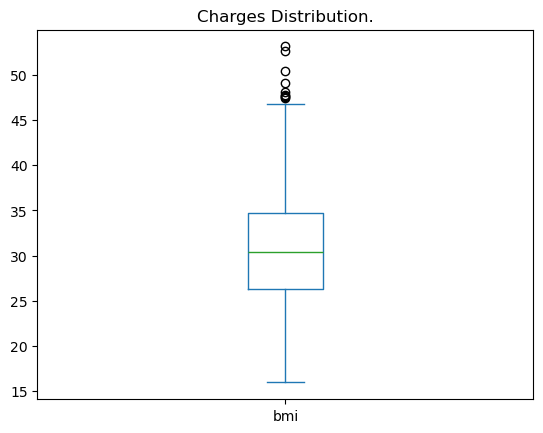

In [44]:
insurance_data1['bmi'].plot(kind = 'box')
plt.title("Charges Distribution.")
plt.show()

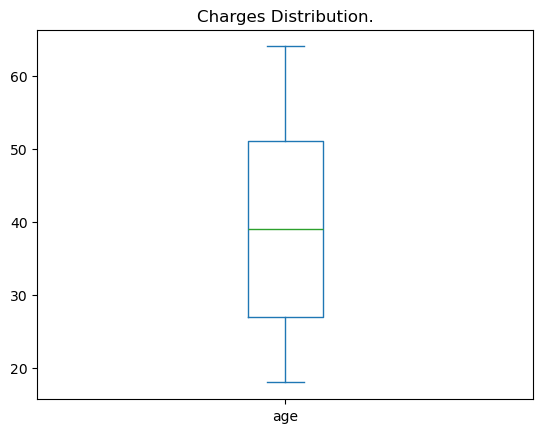

In [45]:
insurance_data1['age'].plot(kind = 'box')
plt.title("Charges Distribution.")
plt.show()

Pie-Chart Region

In [46]:
region_count = insurance_data1["region"].value_counts()
region_count

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

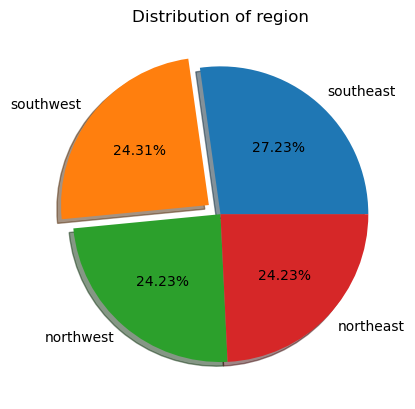

In [47]:
plt.pie(labels = region_count.index,
        x=region_count.values,
        shadow=True,
        autopct='%.2f%%',
        explode=(0,0.1,0,0))
plt.title("Distribution of region")
plt.show()

Correlation Matrix


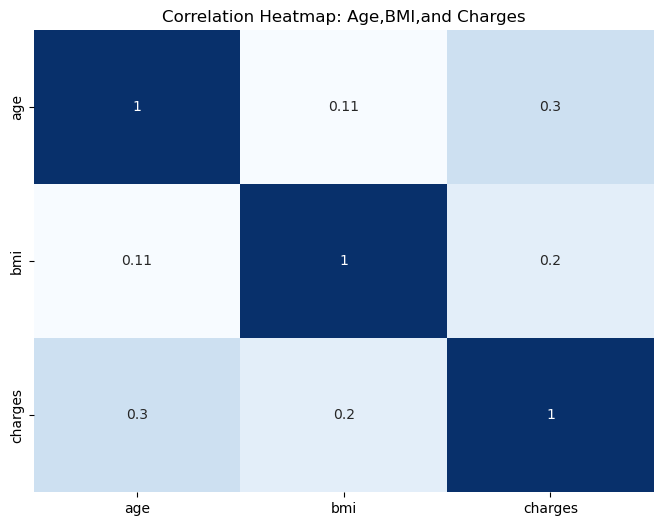

In [49]:
corr_data = insurance_data1[["age","bmi","charges"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(round(corr_data,2),annot=True,cmap="Blues",cbar=False)
plt.title("Correlation Heatmap: Age,BMI,and Charges")
plt.show()


Scatter plot

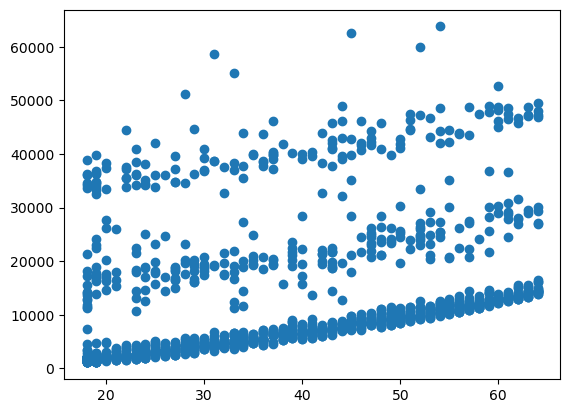

In [50]:
plt.scatter(data = insurance_data1,x ='age', y = 'charges')


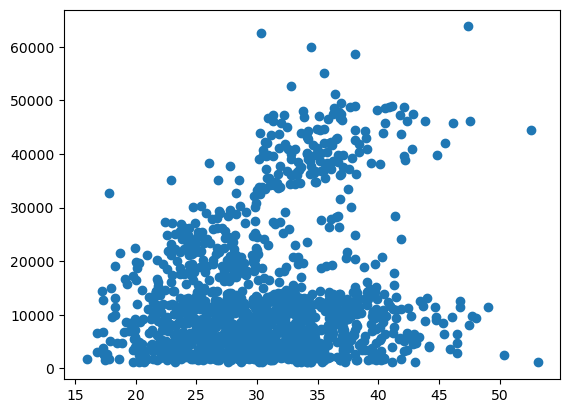

In [51]:
plt.scatter(data = insurance_data1,x ='bmi', y = 'charges')


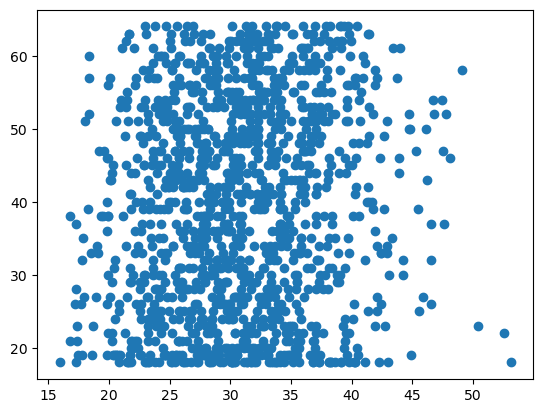

In [52]:
plt.scatter(data = insurance_data1,x ='bmi', y = 'age')


Insurance cost for Smokers and Non Smoker

In [53]:
smoker_df = insurance_data1.groupby("smoker")["charges"].mean().reset_index()
smoker_df

,smoker,charges
0,no,8440.660307
1,yes,32050.231832


<Axes: xlabel='smoker'>

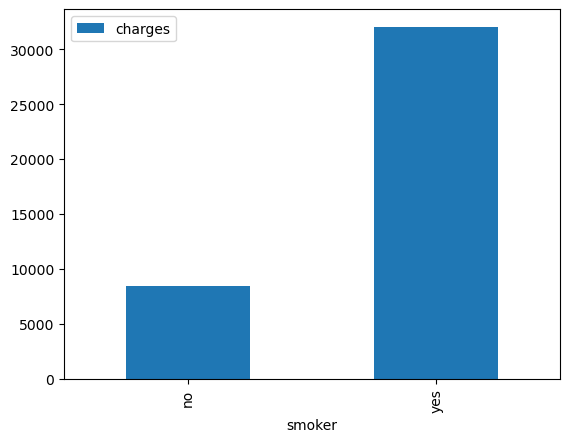

In [54]:
smoker_df.plot(kind = 'bar',x ='smoker',y = 'charges')

Insurance cost for Male and Female

In [55]:
gender_df = insurance_data1.groupby("sex")["charges"].mean().reset_index()
gender_df

,sex,charges
0,female,12569.578844
1,male,13974.998864


<Axes: xlabel='sex'>

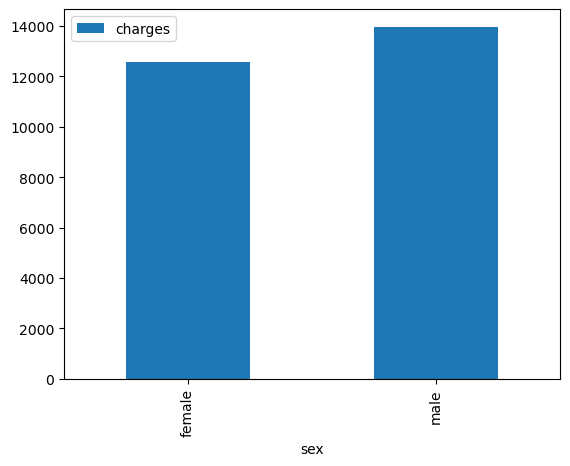

In [56]:
gender_df.plot(kind = 'bar', x ='sex', y = 'charges')

Region wise Insurance cost

In [57]:
region_df = insurance_data1.groupby("region")["charges"].mean().reset_index()
region_df

,region,charges
0,northeast,13406.384516
1,northwest,12450.840844
2,southeast,14735.411438
3,southwest,12346.937377


<Axes: xlabel='region'>

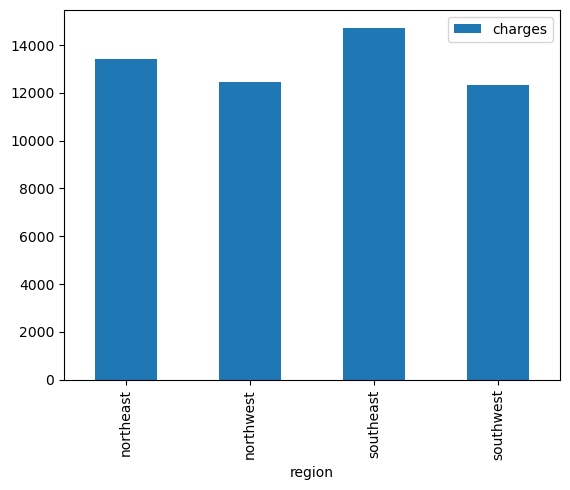

In [59]:
region_df.plot(kind = 'bar' ,x = 'region', y = 'charges')

Region wise BMI

In [60]:
region_bmi_df = insurance_data1.groupby("region")["bmi"].mean().reset_index()
region_bmi_df

,region,bmi
0,northeast,29.173503
1,northwest,29.195494
2,southeast,33.355989
3,southwest,30.596615


<Axes: xlabel='region'>

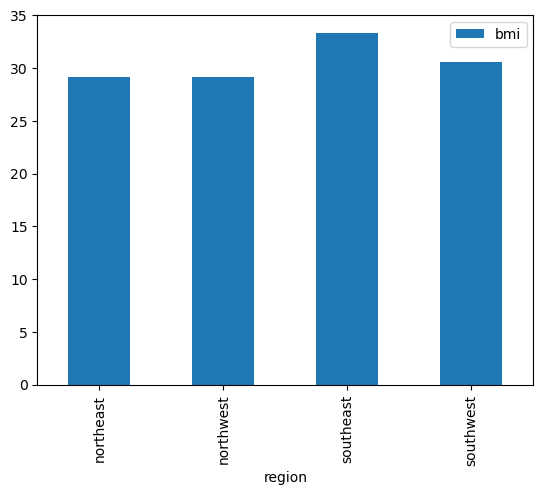

In [61]:
region_bmi_df.plot(kind = 'bar',x = 'region', y = 'bmi')

Region wise Male and Female and cost

In [63]:
pd.crosstab(insurance_data1.region,insurance_data1.sex).count()

sex
female    4
male      4
dtype: int64

In [64]:
insurance_data1.groupby(["region",'sex'])['sex'].count()

region     sex   
northeast  female    161
           male      163
northwest  female    164
           male      160
southeast  female    175
           male      189
southwest  female    162
           male      163
Name: sex, dtype: int64